In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
web_graph = {
'A': ['B', 'C'],
'B': ['C', 'D'],
'C': ['A', 'D'],
'D': ['C'],
'E': ['A', 'D'],
}


In [26]:
def pagerank(graph, d=0.85, tol=1e-6, max_iter=100):
    # Initialize ranks
    n = len(graph)
    ranks = {page: 1 / n for page in graph}  # Initial rank for all pages

    for _ in range(max_iter):
        new_ranks = {}
        for page in graph:
            # Calculate rank contributions from other pages linking to 'page'
            rank_sum = sum(ranks[other_page] / len(graph[other_page]) 
                           for other_page in graph if page in graph[other_page])
            # Update rank for 'page' using the PageRank formula
            new_ranks[page] = (1 - d) / n + d * rank_sum

        # Check for convergence
        if max(abs(new_ranks[page] - ranks[page]) for page in graph) < tol:
            break
        ranks = new_ranks  # Update ranks for the next iteration

    return ranks


In [27]:
 pagerank_scores = pagerank(web_graph)

In [28]:
 sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1],reverse=True)

In [29]:
print("PageRank Scores:")
for page, score in sorted_pagerank:
    print(f"Page {page}: {score:.4f}")


PageRank Scores:
Page C: 0.3871
Page D: 0.2575
Page A: 0.2073
Page B: 0.1181
Page E: 0.0300


In [30]:


def visualize_graph(graph, ranks):
    # Define positions for the nodes (pages) in the graph
    positions = {
        'A': (1, 2),
        'B': (2, 3),
        'C': (3, 2),
        'D': (2, 1),
        'E': (0, 1.5),
    }

    fig, ax = plt.subplots()

    # Plot nodes (web pages) with sizes based on PageRank scores
    for page, (x, y) in positions.items():
        ax.scatter(x, y, s=ranks[page] * 2000, color='skyblue',
                   edgecolors='black', zorder=2)
        ax.text(x, y, page, fontsize=10, ha='center', va='center', zorder=3)

    # Plot edges (links between pages)
    for page, links in graph.items():
        for link in links:
            start_pos = positions[page]
            end_pos = positions[link]
            ax.annotate("", xy=end_pos, xytext=start_pos,
                        arrowprops=dict(arrowstyle="->", color='gray', lw=1))

    ax.set_xlim(-1, 4)
    ax.set_ylim(0, 4)
    ax.axis('off')  # Remove axis for better visual appearance
    plt.show()


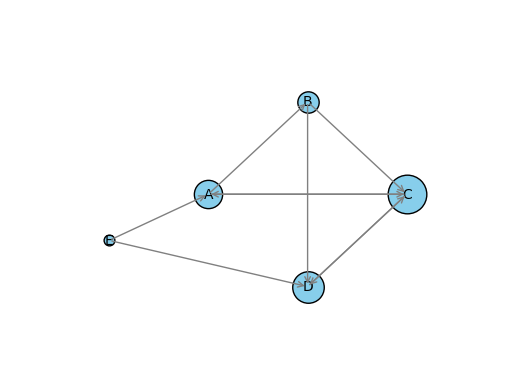

In [31]:
visualize_graph(web_graph, pagerank_scores)